In [2]:
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=8d5b4da276fe0b70e6f111af3d4def804b4314e4fc799c0632b9a95f951d02fd
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [5]:
!pip install qiskit qiskit-aer matplotlib

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi
import matplotlib.pyplot as plt


QFT circuit for 2 qubits:


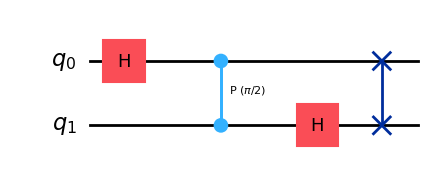


QFT circuit for 3 qubits:


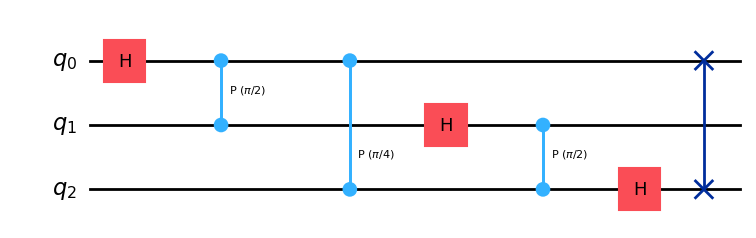


QFT circuit for 4 qubits:


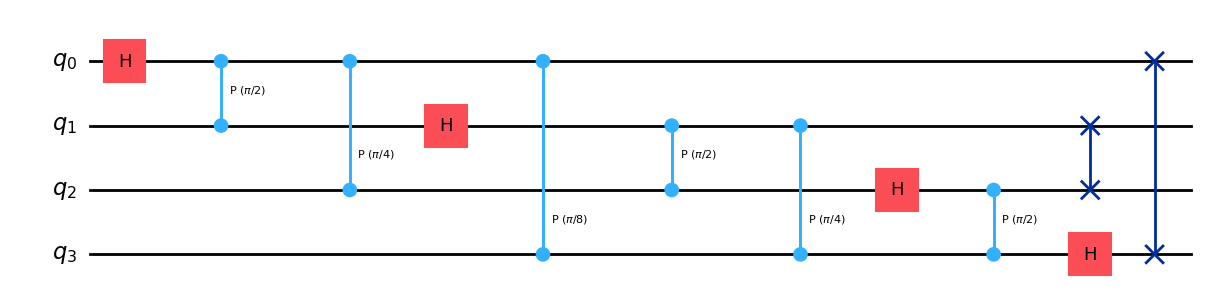

In [7]:
#Task 1: Quantum Fourier Transform (QFT) — Variable Qubits
def qft(n):
    qc = QuantumCircuit(n)
    for j in range(n):
        qc.h(j)
        for k in range(j+1, n):
            qc.cp(2 * pi / (2 ** (k - j + 1)), k, j)
    # Swap qubits (reverse order)
    for i in range(n // 2):
        qc.swap(i, n - i - 1)
    qc.name = "QFT"
    return qc

# Run for 2, 3, and 4 qubits
for n in [2, 3, 4]:
    qc = qft(n)
    print(f"\nQFT circuit for {n} qubits:")
    display(qc.draw('mpl'))

#As the number of qubits increases, the QFT circuit grows in depth and controlled-phase gates — showing its recursive structure and increasing quantum interference complexity.

Inverse QFT Circuit (3 qubits):


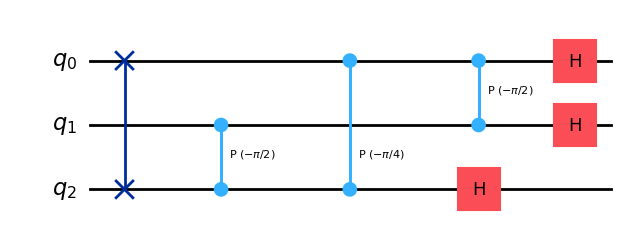

In [8]:
#Task 2: Inverse QFT
def inverse_qft(n):
    qc = QuantumCircuit(n)
    # Swap qubits back
    for i in range(n // 2):
        qc.swap(i, n - i - 1)
    # Apply inverse rotations
    for j in reversed(range(n)):
        for k in reversed(range(j)):
            qc.cp(-pi / (2 ** (j - k)), k, j)
        qc.h(j)
    qc.name = "Inverse QFT"
    return qc

n = 3
inv_qft_circuit = inverse_qft(n)
print("Inverse QFT Circuit (3 qubits):")
inv_qft_circuit.draw('mpl')


#The Inverse QFT undoes the phase rotations of the QFT — it’s the exact mirror circuit with reversed gate order and opposite rotation angles.

Phase Estimation Circuit:


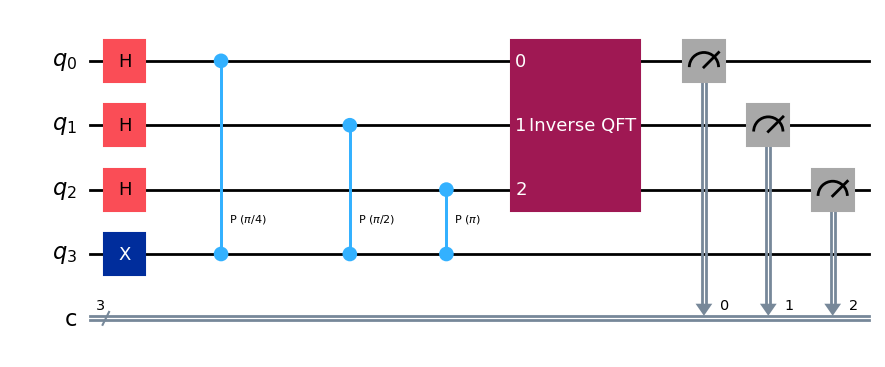

In [9]:
#Task 3: Integration with Phase Estimation
def phase_estimation_example():
    n_count = 3  # counting qubits
    qc = QuantumCircuit(n_count + 1, n_count)

    # Apply Hadamard to counting qubits
    qc.h(range(n_count))
    qc.x(n_count)  # target qubit in |1>

    # Controlled phase rotation (phase shift of π/4)
    for q in range(n_count):
        qc.cp((pi / 4) * (2 ** q), q, n_count)

    # Apply inverse QFT to counting qubits
    qc.append(inverse_qft(n_count), range(n_count))

    qc.measure(range(n_count), range(n_count))
    return qc

qc_phase = phase_estimation_example()
print("Phase Estimation Circuit:")
qc_phase.draw('mpl')

#The Inverse QFT undoes the phase rotations of the QFT — it’s the exact mirror circuit with reversed gate order and opposite rotation angles.

In [19]:
#Task 4: Measurement & Simulation
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from IPython.display import Image, display

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi

def run_qft_with_measurement(n):
    qc = qft(n)
    qc.measure_all()
    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=1024).result()

    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()
    print(qc.draw(output='text'))
    print("Measurement counts:", counts)

run_qft_with_measurement(3)

        ┌───┐                                         ░ ┌─┐      
   q_0: ┤ H ├─■────────■───────────────────────────X──░─┤M├──────
        └───┘ │P(π/2)  │       ┌───┐               │  ░ └╥┘┌─┐   
   q_1: ──────■────────┼───────┤ H ├─■─────────────┼──░──╫─┤M├───
                       │P(π/4) └───┘ │P(π/2) ┌───┐ │  ░  ║ └╥┘┌─┐
   q_2: ───────────────■─────────────■───────┤ H ├─X──░──╫──╫─┤M├
                                             └───┘    ░  ║  ║ └╥┘
meas: 3/═════════════════════════════════════════════════╩══╩══╩═
                                                         0  1  2 
Measurement counts: {'110': 140, '101': 116, '100': 118, '111': 123, '011': 121, '001': 113, '000': 152, '010': 141}


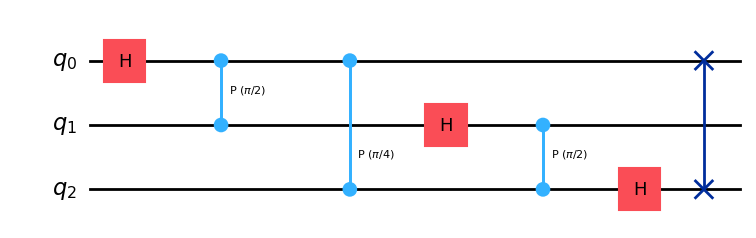

In [22]:
#Task 5: Circuit Visualization
qc = qft(3)
qc.draw('mpl')

#qc.draw('mpl') displays a clean, graphical circuit diagram showing Hadamard and controlled-phase gates — making the QFT’s layered structure easy to interpret visually.